# Treeline

This project is a Python implementation of Logistic Regression from scratch. It's part of a set of personal projects that implement fundamental machine learning algorithms. I'm going to be the best one day.

## Logistic Regression

i have no clue...

## References

1. [Logistic Regression from Scratch](https://philippmuens.com/logistic-regression-from-scratch)
2. [Intuition for Log Loss](https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

random_state = 42

In [2]:
df = pd.read_csv("data/smoke_detection_iot.csv")

df = df.drop(columns=[df.columns[0]])

print(df.shape)
df.head()

(62630, 15)


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
print(df.columns)

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')


In [4]:
df.columns = [
    'utc', 
    'temp_c', 
    'hum_percent', 
    'tvoc', 'co2_ppm', 
    'raw_h2', 
    'raw_ethanol', 
    'pressure', 
    'pm1_0',
    'pm2_5',
    'nc0_5',
    'nc1_0',
    'nc2_5',
    'cnt',
    'fire_alarm'
]

df.head()

,utc,temp_c,hum_percent,tvoc,co2_ppm,raw_h2,raw_ethanol,pressure,pm1_0,pm2_5,nc0_5,nc1_0,nc2_5,cnt,fire_alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.describe()

,utc,temp_c,hum_percent,tvoc,co2_ppm,raw_h2,raw_ethanol,pressure,pm1_0,pm2_5,nc0_5,nc1_0,nc2_5,cnt,fire_alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


### Normalize Columns

In [6]:
min_max_scaler = MinMaxScaler()

x = df.values

x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled, columns=df.columns)

In [7]:
df.describe()

,utc,temp_c,hum_percent,tvoc,co2_ppm,raw_h2,raw_ethanol,pressure,pm1_0,pm2_5,nc0_5,nc1_0,nc2_5,cnt,fire_alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,0.191161,0.463515,0.586402,0.032368,0.004531,0.725504,0.728255,0.863098,0.007018,0.004060,0.007994,0.003922,0.002666,0.420573,0.714626
std,0.263249,0.175245,0.137533,0.130193,0.031978,0.086910,0.100035,0.147779,0.064361,0.043500,0.069381,0.042661,0.036081,0.304000,0.451596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074324,0.402786,0.570742,0.002167,0.000000,0.689633,0.675858,0.871129,0.000089,0.000029,0.000143,0.000027,0.000001,0.145051,0.000000
50%,0.119016,0.514279,0.611387,0.016350,0.000000,0.719617,0.686690,0.884005,0.000126,0.000041,0.000202,0.000037,0.000001,0.373545,1.000000
75%,0.156486,0.578710,0.659324,0.019817,0.000638,0.778628,0.781388,0.950827,0.000146,0.000048,0.000235,0.000043,0.000002,0.686782,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plot Some Columns

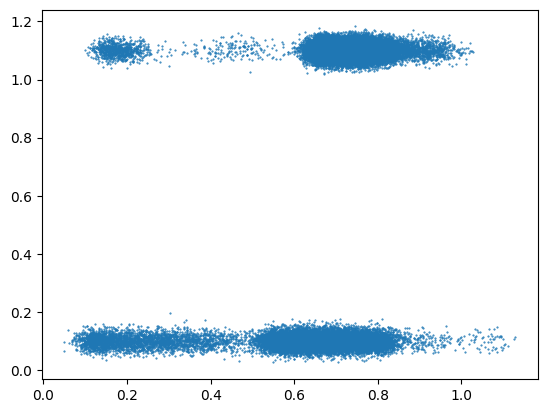

In [8]:
mu = 0.1
sigma = 0.02

noise_x = sigma * np.random.randn(len(df)) + mu
noise_y = sigma * np.random.randn(len(df)) + mu


plt.scatter(df['hum_percent'] + noise_x, df['fire_alarm'] + noise_y, s=0.25, alpha=1);

### Train Test Split

In [9]:
features = df.drop(columns=df.columns[-1])

features.head()

,utc,temp_c,hum_percent,tvoc,co2_ppm,raw_h2,raw_ethanol,pressure,pm1_0,pm2_5,nc0_5,nc1_0,nc2_5,cnt
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


In [10]:
# add bias column
bias_column = pd.DataFrame(np.ones((len(features)))).set_index(features.index)

features = pd.concat([features, bias_column], axis=1)

features.head()

,utc,temp_c,hum_percent,tvoc,co2_ppm,raw_h2,raw_ethanol,pressure,pm1_0,pm2_5,nc0_5,nc1_0,nc2_5,cnt,0
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000,1.0
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004,1.0
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008,1.0
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012,1.0
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016,1.0


In [11]:
labels = df[df.columns[-1]]

labels.describe()

count    62630.000000
mean         0.714626
std          0.451596
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fire_alarm, dtype: float64

In [12]:
X = features.to_numpy()
y = labels.to_numpy()

In [13]:
print(f"X: {X.shape}")

print(f"y: {y.shape}")

X: (62630, 15)
y: (62630,)


In [14]:
test_size = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

### Logistic Regression Implementation

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

assert sigmoid(0) == 0.5
assert sigmoid(1) > 0.5
assert sigmoid(-1) < 0.5

#### Graph the Sigmoid Function

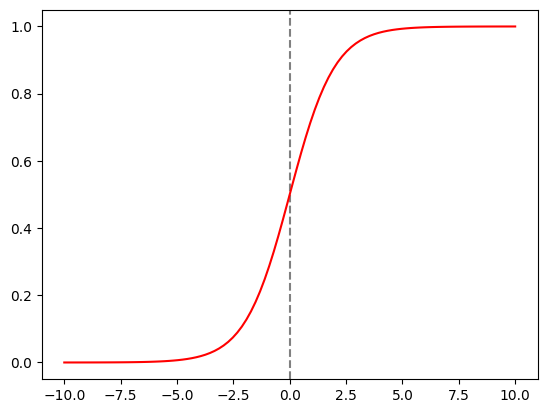

In [16]:
graph_inp = np.linspace(-10, 10, 100)

plt.axvline(x=0, color='gray', linestyle='--')
plt.plot(graph_inp, sigmoid(graph_inp), color='red')

plt.show()

## Probability Density Function

### $P(y_i | \beta_{x_i}) = \sigma(\beta_{x_i})^{y_i} \times (1 - \sigma(\beta_{x_i})^{1-{y_i}}$

In [17]:
def pdf(y, B, x, i):
    return sigmoid(B[x[i]]) ** y[i] * (1 - sigmoid(B[x[i]]) ** (1-y[i]))

I'm so bad at statistics and probability. Thank god computers can do this for me.

Given some model $\beta$...

and an input $x_i$...

each corresponding $y_i$...

takes the value 1 with probability $1 - \sigma(\beta_{x_i})$...

and takes the value 0 with probability $\sigma(\beta_{x_i})$.

That's the same or at least very similar to a Bernoulli distribution.

I honestly have no clue how this fits in with everything I have 0 intuition for this. I think it comes into play with the loss function.

### Loss function

With many (or maybe all? update: no not all, with perceptrons for example, we don't have a loss function, and instead we have an update rule...but maybe this rule is based on the derivative of a loss function) machine learning problems we have model parameters (or more generally, a model) that can produce an output given an input. We also have a loss function, which tells us how correct or incorrect our predictions are. At this moment I'm blanking on how we know that. If we have a function that tells us if we are right or wrong, can we just use that to make predictions? Fuck. We use the loss function to train our model though. It does not come into play at all with making actual predictions.

I've come back after doing more research. The loss function is a function that has two parameters: your features and their label. It measures the "cost" or "error" of a prediction. So it is precisely because we have the labels in supervised learning that we can perform optimization of a loss function.

Note for myself. Think back to COGS 181...remember there was the hard loss function which is 1 if your prediction is correct and 0 if it's incorrect. This is the most basic and direct way to measure loss, but this function isn't differentiable. It would look something like this:

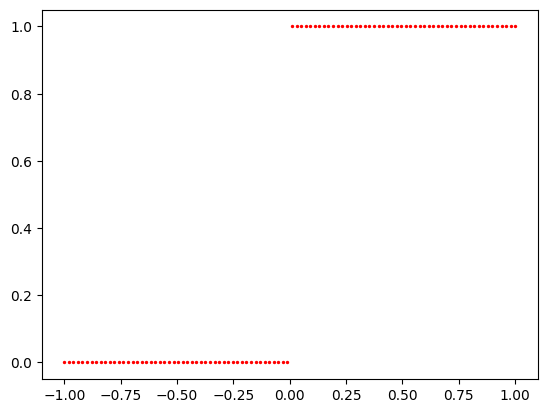

In [21]:
def hard_loss(x):
    if x > 0:
        return 1
    else:
        return 0

graph_inp = np.linspace(-1, 1, 100)
graph_out = np.vectorize(hard_loss)(graph_inp)

plt.scatter(graph_inp, graph_out, color='red', s=2)

plt.show()

I'm using `plt.scatter` here because if you just do `plt.plot`, it connects the points. Anyways, it's a piecewise function that is not differentiable at a certain point. I'm not sure where this point is though. It would be 1 if the prediction is right and 0 if the prediction is wrong. The general explanation is that the function is discrete, as it can only take two values (0 and 1). Discrete functions are not differentiable.

So if you take this as your premise, and you know you need something that *is* differentiable to be able to do optimization, the next step is to find another function that approximates this hard loss function and *is* differentiable. We can then just optimize this function with gradient descent to find the best parameters. I believe this is how most machine learning algorithms are set up. I could be wrong.

#### Maximum Likelihood Estimation (MLE)

Marthelo told us about this all those years ago and I never paid attention. I loved him.

In [36]:
def log_loss(y, y_prime):
    return -((y * np.log(y_prime)) + ((1 - y) * np.log(1 - y_prime)))

# these tests are stolen from reference #1
assert 2.30 < log_loss(1, 0.1) < 2.31
assert 2.30 < log_loss(0, 0.9) < 2.31
assert 0.10 < log_loss(1, 0.9) < 0.11
assert 0.10 < log_loss(0, 0.1) < 0.11

/tmp/ipykernel_5192/3117507372.py:2: RuntimeWarning: divide by zero encountered in log
  return -((y * np.log(y_prime)) + ((1 - y) * np.log(1 - y_prime)))
/tmp/ipykernel_5192/3117507372.py:2: RuntimeWarning: invalid value encountered in log
  return -((y * np.log(y_prime)) + ((1 - y) * np.log(1 - y_prime)))


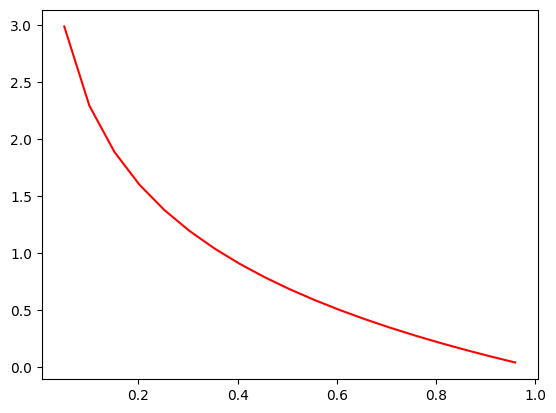

In [33]:
graph_inp = np.linspace(0, 5, 100)
graph_out = [log_loss(1, x) for x in graph_inp]

plt.plot(graph_inp, graph_out, color='red');

As we can see, if the ground truth is 1, the farther from 1 we predict, the higher our loss is. This scales exponentially and not linearly. The idea for this graph came from reference #2. Great article for this topic.

We can also observe that this is reversed when the ground truth is 0.

/tmp/ipykernel_5192/3117507372.py:2: RuntimeWarning: divide by zero encountered in log
  return -((y * np.log(y_prime)) + ((1 - y) * np.log(1 - y_prime)))
/tmp/ipykernel_5192/3117507372.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -((y * np.log(y_prime)) + ((1 - y) * np.log(1 - y_prime)))
/tmp/ipykernel_5192/3117507372.py:2: RuntimeWarning: invalid value encountered in log
  return -((y * np.log(y_prime)) + ((1 - y) * np.log(1 - y_prime)))


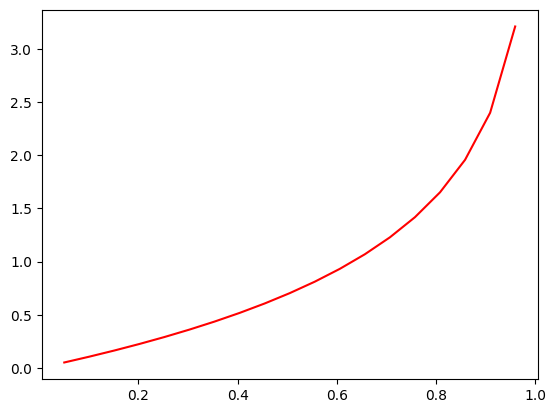

In [34]:
graph_inp = np.linspace(0, 5, 100)
graph_out = [log_loss(0, x) for x in graph_inp]

plt.plot(graph_inp, graph_out, color='red');

To find the complete loss of our data, we iterate over it, make predictions and then find the average of all of the losses for all datapoints.

The next step of logistic regression is to optimize this function. I think something that is important to note is that this loss function was selected almost arbitrarily. It's possible that this is the "standard" loss function for logistic regression, but I think you could choose any loss function and you'd follow the same steps. You pick a measure of error and optimize using that. Even gradient descent isn't a requirement. I believe there are other ways of minimizing loss. For example, if you use a loss function that is convex...you can simply solve for the single minima and use those paramters. However, I think in most cases this isn't practical...or else everyone would be doing this.

### Gradient Descent

Just as a refresher for myself and possible readers...gradient descent uses the calculus concept of gradients to push the model parameters in the right direction towards the minima of a loss function. Each parameter in your model is somewhat responsible for the loss value. Gradient descent aims to correct each parameter according to how much it contributed to the loss. To me, this is most easily understood with perceptrons or neural networks that optimize with gradient descent (because I don't think all of them do). Each neuron is a dot product (your inputs @ your weights) and an addition operation (dot product plus bias). By the end of the neural network, your output value is a dot product of a dot product of a dot product of a dot product...and so on. You can decompose the final output value into a giant single expression that has each of your weights. You then take the gradient of this giant massive huge expression with respect to each individual weight to find out how much it contributed to the loss. Love this stuff man.

However...I have no clue how I'm going to implement this. I just have to implement the derivative of the `log_loss` function? fuckkk